In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
df["Gender"]=pd.get_dummies(df["Gender"],drop_first=True)

In [ ]:
km=KMeans(n_clusters=3)
km

In [ ]:
attributes=df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
cluster=km.fit_predict(df[["Gender","Age", "Annual Income (k$)", "Spending Score (1-100)"]])
cluster

In [ ]:
df["cluster"]=cluster
df.head()

In [ ]:
df.head()

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age, df1["Annual Income (k$)"], color="green")
plt.scatter(df2.Age, df2["Annual Income (k$)"], color="blue")
plt.scatter(df3.Age, df3["Annual Income (k$)"], color="red")

plt.xlabel('Age')
plt.ylabel("Annual Income (k$)")
plt.legend()

In [ ]:
k_rng=range(1,5)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(df[["Gender","Age", "Annual Income (k$)", "Spending Score (1-100)"]])
    sse.append(km.inertia_)

In [ ]:
sse

In [ ]:
plt.plot(k_rng, sse)

In [ ]:
scaler=MinMaxScaler()
df["Age"]=scaler.fit_transform(df[["Age"]])
df.head()

In [ ]:
df["Annual Income (k$)"]=scaler.fit_transform(df[["Annual Income (k$)"]])
df["Spending Score (1-100)"]=scaler.fit_transform(df[["Spending Score (1-100)"]])
df.head()

In [9]:
kmm=KMeans(n_clusters=6)
y_predict=kmm.fit_predict(df[["Gender","Age", "Annual Income (k$)", "Spending Score (1-100)"]])
y_predict

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 0, 5,
       4, 1, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 2, 5, 2, 3, 2, 3, 2, 3, 2,
       5, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [10]:
df["cluster"]=y_predict
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


No handles with labels found to put in legend.


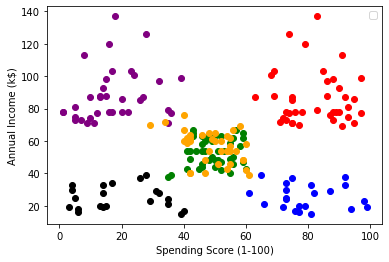

In [11]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
df6=df[df.cluster==5]

plt.scatter(df1["Spending Score (1-100)"], df1["Annual Income (k$)"], color="green")
plt.scatter(df2["Spending Score (1-100)"], df2["Annual Income (k$)"], color="blue")
plt.scatter(df3["Spending Score (1-100)"], df3["Annual Income (k$)"], color="red")
plt.scatter(df4["Spending Score (1-100)"], df4["Annual Income (k$)"], color="purple")
plt.scatter(df5["Spending Score (1-100)"], df5["Annual Income (k$)"], color="black")
plt.scatter(df6["Spending Score (1-100)"], df6["Annual Income (k$)"], color="orange")

plt.xlabel('Spending Score (1-100)')
plt.ylabel("Annual Income (k$)")
plt.legend()

<AxesSubplot:xlabel='Age', ylabel='Count'>

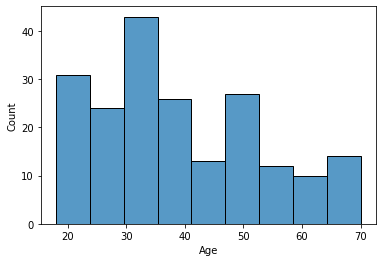

In [18]:
sns.histplot(df["Age"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

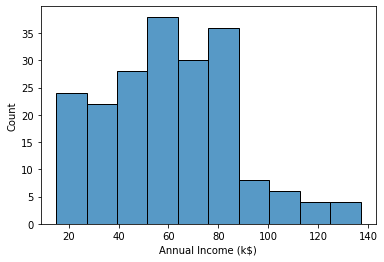

In [19]:
sns.histplot(df["Annual Income (k$)"])

C:\Users\Dell\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

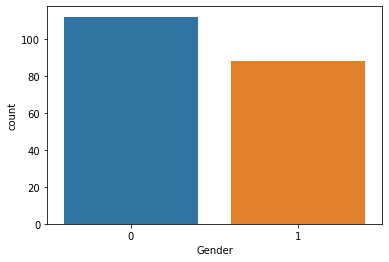

In [20]:
sns.countplot(df["Gender"])